In [1]:
from fastai.vision import *
from pathlib import Path
import json

In [2]:
path = Path('/home/jupyter/logo-detection/data/openlogo')

In [3]:
annots = json.load(open(path/'instances.json'))

In [4]:
annots.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [5]:
annots['annotations'][0]

{'segmentation': [[185, 214, 185, 250, 236, 250, 236, 214]],
 'area': 1836,
 'iscrowd': 0,
 'ignore': 0,
 'image_id': 20180000001,
 'bbox': [185, 214, 51, 36],
 'category_id': 1,
 'id': 1}

In [6]:
annots['categories']

[{'supercategory': 'none', 'id': 1, 'name': 'nissan'},
 {'supercategory': 'none', 'id': 2, 'name': 'firelli'},
 {'supercategory': 'none', 'id': 3, 'name': 'infiniti'},
 {'supercategory': 'none', 'id': 4, 'name': 'infiniti_text'},
 {'supercategory': 'none', 'id': 5, 'name': 'redbull'},
 {'supercategory': 'none', 'id': 6, 'name': 'total'},
 {'supercategory': 'none', 'id': 7, 'name': 'volkswagen'},
 {'supercategory': 'none', 'id': 8, 'name': 'boeing'},
 {'supercategory': 'none', 'id': 9, 'name': 'olympics'},
 {'supercategory': 'none', 'id': 10, 'name': 'kfc'},
 {'supercategory': 'none', 'id': 11, 'name': 'dhl'},
 {'supercategory': 'none', 'id': 12, 'name': 'chimay'},
 {'supercategory': 'none', 'id': 13, 'name': 'ups'},
 {'supercategory': 'none', 'id': 14, 'name': 'anz_text'},
 {'supercategory': 'none', 'id': 15, 'name': 'fosters'},
 {'supercategory': 'none', 'id': 16, 'name': 'rittersport'},
 {'supercategory': 'none', 'id': 17, 'name': 'ec'},
 {'supercategory': 'none', 'id': 18, 'name': '

In [7]:
len(annots['images'])

27083

In [8]:
images, lbl_bbox = get_annotations(path/'instances.json')

In [9]:
images[0], lbl_bbox[0]

('nissan9.jpg', [[[214, 185, 250, 236]], ['nissan']])

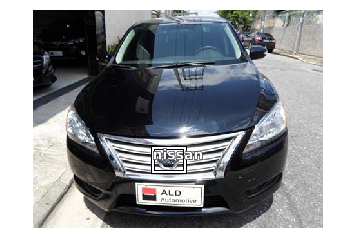

In [10]:
img = open_image(path/'JPEGImages'/images[0])
bbox = ImageBBox.create(*img.size, lbl_bbox[0][0], [0], classes=['nissan'])
img.show(figsize=(6,4), y=bbox)

In [11]:
print(img.size)

torch.Size([338, 450])


In [12]:
images[12], lbl_bbox[12]

('logos32plus_006135.jpg',
 [[[375, 658, 421, 701], [315, 316, 353, 359]],
  ['rittersport', 'rittersport']])

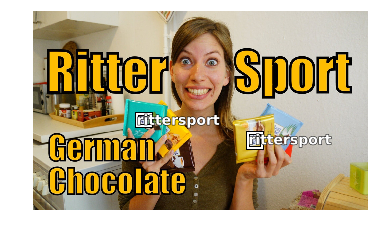

In [13]:
img = open_image(path/'JPEGImages'/images[12])
bbox = ImageBBox.create(*img.size, lbl_bbox[12][0], [0, 1], classes=['rittersport', 'rittersport'])
img.show(figsize=(6,4), y=bbox)

In [14]:
images[13], lbl_bbox[13]

('shellimg000251.jpg',
 [[[457, 377, 476, 393],
   [107, 138, 186, 219],
   [139, 606, 192, 665],
   [433, 244, 445, 254]],
  ['ec', 'shell', 'shell', 'shell']])

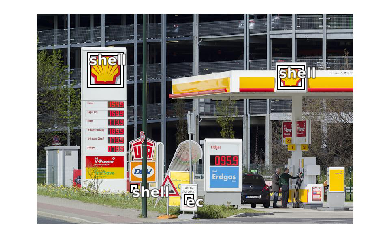

In [15]:
img = open_image(path/'JPEGImages'/images[13])
bbox = ImageBBox.create(*img.size, lbl_bbox[13][0], [0, 1, 2, 3], classes=['ec', 'shell', 'shell', 'shell'])
img.show(figsize=(6,4), y=bbox)

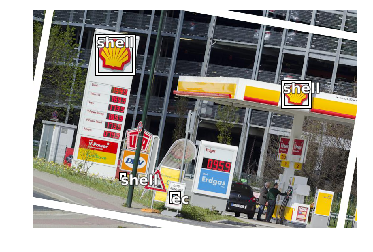

In [16]:
img = img.rotate(-10)
bbox = bbox.rotate(-10)
img.show(figsize=(6,4), y=bbox)

In [17]:
img2bbox = dict(zip(images, lbl_bbox))

In [18]:
img2bbox

{'nissan9.jpg': [[[214, 185, 250, 236]], ['nissan']],
 'redbullimg000714.jpg': [[[282, 237, 317, 278],
   [138, 116, 180, 151],
   [167, 112, 196, 151],
   [55, 74, 69, 135],
   [192, 483, 234, 553],
   [62, 133, 119, 191],
   [297, 349, 376, 474],
   [78, 51, 96, 77]],
  ['firelli',
   'infiniti',
   'infiniti_text',
   'infiniti_text',
   'redbull',
   'redbull',
   'total',
   'total']],
 'volkswagen16.jpg': [[[247, 493, 273, 519]], ['volkswagen']],
 'boeing12.jpg': [[[77, 142, 210, 261]], ['boeing']],
 'olympics13.jpg': [[[1, 26, 356, 609]], ['olympics']],
 'kfc12.jpg': [[[330, 458, 426, 539]], ['kfc']],
 'logos32plus_002856.jpg': [[[330, 95, 363, 304], [188, 876, 210, 996]],
  ['dhl', 'dhl']],
 'logos32plus_001868.jpg': [[[163, 190, 624, 299]], ['chimay']],
 'UPSimg000072.jpg': [[[157, 232, 248, 285]], ['ups']],
 'ANZ_sportslogo_28.jpg': [[[86, 596, 176, 780], [218, 188, 250, 232]],
  ['anz_text', 'anz_text']],
 '4457073795.jpg': [[[166, 431, 307, 569]], ['fosters']],
 '1430342798

In [19]:
img2bbox_df = pd.DataFrame(img2bbox).transpose()
img2bbox_df = img2bbox_df.reset_index()
img2bbox_df['label'] = img2bbox_df[[0, 1]].values.tolist()
img2bbox_df = img2bbox_df[['index', 'label', 1]]
img2bbox_df.columns = ['filename', 'label', 'brand']
#img2bbox_df['brand'] = img2bbox_df['brand'].str[0]

In [20]:
img2bbox_df.head()

filename                                              label  \
0           nissan9.jpg                 [[[214, 185, 250, 236]], [nissan]]   
1  redbullimg000714.jpg  [[[282, 237, 317, 278], [138, 116, 180, 151], ...   
2      volkswagen16.jpg             [[[247, 493, 273, 519]], [volkswagen]]   
3          boeing12.jpg                  [[[77, 142, 210, 261]], [boeing]]   
4        olympics13.jpg                  [[[1, 26, 356, 609]], [olympics]]   

                                               brand  
0                                           [nissan]  
1  [firelli, infiniti, infiniti_text, infiniti_te...  
2                                       [volkswagen]  
3                                           [boeing]  
4                                         [olympics]

In [21]:
sum(['cocacola' in x for x in img2bbox_df.loc[:,'brand']])

795

In [22]:
def filter_brand(df, brand):
    label_series = []
    brand_series = []
    
    brand_mask = [brand in x for x in df.loc[:,'brand']]
    brand_df = df[brand_mask].reset_index(drop=True)
    
    for i in range(len(brand_df)):
        brand_idx = [j for j, x in enumerate(brand_df['label'][i][1]) if x == brand]
        label_bbox = [brand_df['label'][i][0][k] for k in brand_idx]
        label_brand = [brand_df['label'][i][1][k] for k in brand_idx]
        
        label_series.append([label_bbox, label_brand])
        brand_series.append(label_brand)
    
    brand_df['label'] = label_series
    brand_df['brand'] = brand_series
        
    return brand_df

In [23]:
img2bbox_df_red = filter_brand(img2bbox_df, 'cocacola')

In [24]:
img2bbox_df_red

filename  \
0                 1546003088.jpg   
1         coca-colaimg000517.jpg   
2         logos32plus_002018.jpg   
3         coca-colaimg000661.jpg   
4         logos32plus_002279.jpg   
5         logos32plus_001989.jpg   
6         McDonaldsimg000282.jpg   
7         coca-colaimg000310.jpg   
8         logos32plus_002025.jpg   
9             shellimg000137.jpg   
10        logos32plus_002158.jpg   
11        logos32plus_002091.jpg   
12       Belgalogos_07642141.jpg   
13                4525693974.jpg   
14        logos32plus_002133.jpg   
15                3921731658.jpg   
16        logos32plus_002132.jpg   
17        coca-colaimg000619.jpg   
18        logos32plus_002104.jpg   
19        logos32plus_002266.jpg   
20        logos32plus_002271.jpg   
21          Walmartimg000012.jpg   
22        coca-colaimg000499.jpg   
23                3103636207.jpg   
24        coca-colaimg000655.jpg   
25        coca-colaimg000639.jpg   
26        coca-colaimg000777.jpg   
27        coca-colaimg000860.jpg   
28        coca-colaimg000565.jpg   
29        coca-colaimg000720.jpg   
..                           ...   
765               2223587931.jpg   
766       coca-colaimg000256.jpg   
767       logos32plus_002034.jpg   
768       logos32plus_002203.jpg   
769       coca-colaimg000249.jpg   
770               3662212543.jpg   
771       logos32plus_002170.jpg   
772       logos32plus_002185.jpg   
773   flickrlogo27_474572183.jpg   
774       logos32plus_002151.jpg   
775       coca-colaimg000633.jpg   
776       logos32plus_002022.jpg   
777       logos32plus_002000.jpg   
778       coca-colaimg000497.jpg   
779       logos32plus_002175.jpg   
780       logos32plus_002087.jpg   
781  flickrlogo27_3759339764.jpg   
782       coca-colaimg000456.jpg   
783       logos32plus_002177.jpg   
784       logos32plus_002006.jpg   
785       coca-colaimg000244.jpg   
786       coca-colaimg000298.jpg   
787       coca-colaimg000388.jpg   
788       coca-colaimg000513.jpg   
789       coca-colaimg000272.jpg   
790       logos32plus_002186.jpg   
791       logos32plus_002214.jpg   
792       logos32plus_002204.jpg   
793       coca-colaimg000774.jpg   
794       coca-colaimg000332.jpg   

                                                 label  \
0                 [[[241, 129, 287, 218]], [cocacola]]   
1                 [[[240, 123, 302, 191]], [cocacola]]   
2                   [[[3, 776, 347, 907]], [cocacola]]   
3                 [[[210, 237, 233, 299]], [cocacola]]   
4                 [[[330, 419, 386, 536]], [cocacola]]   
5                  [[[341, 93, 862, 280]], [cocacola]]   
6                 [[[395, 867, 430, 912]], [cocacola]]   
7                   [[[60, 67, 131, 339]], [cocacola]]   
8                 [[[276, 367, 335, 520]], [cocacola]]   
9                   [[[47, 102, 60, 123]], [cocacola]]   
10                [[[645, 483, 724, 663]], [cocacola]]   
11   [[[351, 197, 425, 335], [205, 466, 269, 576], ...   
12   [[[369, 1, 434, 94], [468, 304, 535, 400], [76...   
13   [[[174, 254, 205, 319], [173, 320, 203, 387], ...   
14                 [[[98, 455, 370, 571]], [cocacola]]   
15                [[[175, 275, 225, 411]], [cocacola]]   
16                [[[420, 140, 498, 306]], [cocacola]]   
17   [[[625, 89, 702, 265], [183, 123, 219, 186]], ...   
18                [[[660, 586, 756, 633]], [cocacola]]   
19                 [[[217, 93, 251, 151]], [cocacola]]   
20   [[[219, 577, 271, 677], [205, 751, 263, 842], ...   
21   [[[772, 1557, 880, 1579], [764, 1473, 924, 152...   
22                [[[153, 190, 223, 252]], [cocacola]]   
23   [[[30, 266, 116, 497], [296, 284, 329, 329]], ...   
24   [[[368, 145, 397, 189], [167, 192, 192, 233]],...   
25   [[[115, 208, 174, 361], [112, 436, 128, 464], ...   
26   [[[138, 11, 159, 66], [38, 397, 173, 630]], [c...   
27   [[[948, 331, 1397, 1731], [1016, 1986, 1294, 2...   
28                  [[[86, 83, 175, 307]], [cocacola]]   
29   [[[413, 1773, 735, 2831], [2174, 1437, 2245, 1

In [25]:
def get_data(bs, size):
    src = ObjectItemList.from_df(img2bbox_df_red, path/'JPEGImages')
    src = src.split_by_rand_pct()
    src = src.label_from_df(cols='label')
    #src = src.add_test_folder(path_test/'JPEGImages', tfms=None)
    src = src.transform(get_transforms(do_flip=False), size=size, tfm_y=True)
    return src.databunch(path=path, bs=bs, collate_fn=bb_pad_collate)

In [26]:
data = get_data(64,128)

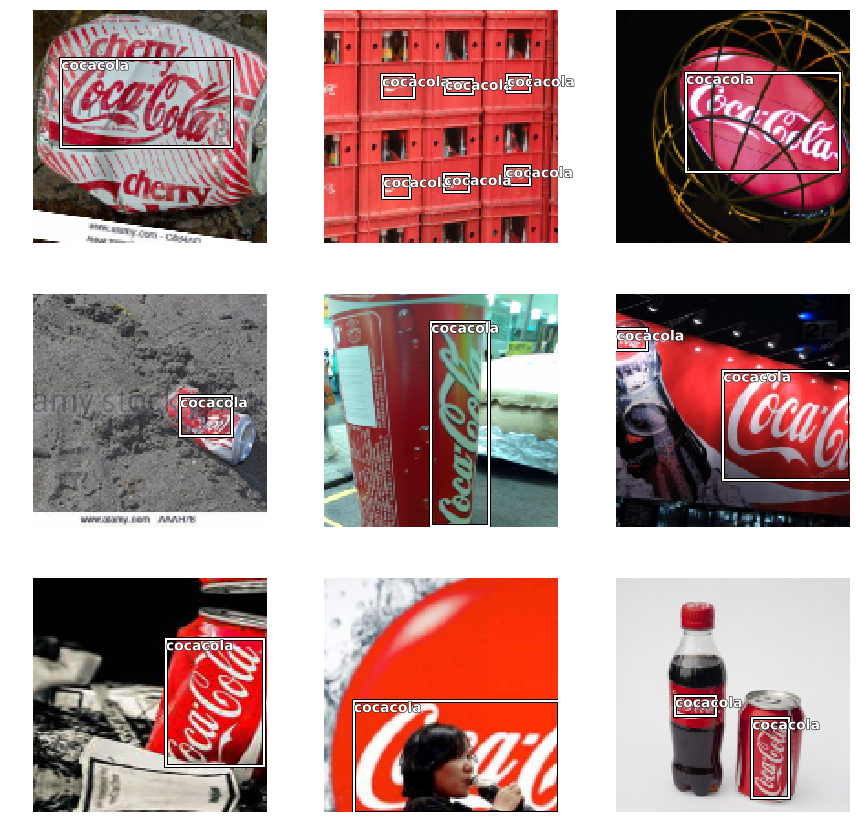

In [27]:
data.show_batch(rows=3)

In [28]:
#Grab the convenience functions that helps us build the Unet
from fastai.vision.models.unet import _get_sfs_idxs, model_sizes, hook_outputs

In [29]:
class LateralUpsampleMerge(nn.Module):
    "Merge the features coming from the downsample path (in `hook`) with the upsample path."
    def __init__(self, ch, ch_lat, hook):
        super().__init__()
        self.hook = hook
        self.conv_lat = conv2d(ch_lat, ch, ks=1, bias=True)
    
    def forward(self, x):
        return self.conv_lat(self.hook.stored) + F.interpolate(x, self.hook.stored.shape[-2:], mode='nearest')

In [30]:
class RetinaNet(nn.Module):
    "Implements RetinaNet from https://arxiv.org/abs/1708.02002"
    def __init__(self, encoder:nn.Module, n_classes, final_bias=0., chs=256, n_anchors=9, flatten=True):
        super().__init__()
        self.n_classes,self.flatten = n_classes,flatten
        imsize = (256,256)
        sfs_szs = model_sizes(encoder, size=imsize)
        sfs_idxs = list(reversed(_get_sfs_idxs(sfs_szs)))
        self.sfs = hook_outputs([encoder[i] for i in sfs_idxs])
        self.encoder = encoder
        self.c5top5 = conv2d(sfs_szs[-1][1], chs, ks=1, bias=True)
        self.c5top6 = conv2d(sfs_szs[-1][1], chs, stride=2, bias=True)
        self.p6top7 = nn.Sequential(nn.ReLU(), conv2d(chs, chs, stride=2, bias=True))
        self.merges = nn.ModuleList([LateralUpsampleMerge(chs, sfs_szs[idx][1], hook) 
                                     for idx,hook in zip(sfs_idxs[-2:-4:-1], self.sfs[-2:-4:-1])])
        self.smoothers = nn.ModuleList([conv2d(chs, chs, 3, bias=True) for _ in range(3)])
        self.classifier = self._head_subnet(n_classes, n_anchors, final_bias, chs=chs)
        self.box_regressor = self._head_subnet(4, n_anchors, 0., chs=chs)
        
    def _head_subnet(self, n_classes, n_anchors, final_bias=0., n_conv=4, chs=256):
        "Helper function to create one of the subnet for regression/classification."
        layers = [conv_layer(chs, chs, bias=True, norm_type=None) for _ in range(n_conv)]
        layers += [conv2d(chs, n_classes * n_anchors, bias=True)]
        layers[-1].bias.data.zero_().add_(final_bias)
        layers[-1].weight.data.fill_(0)
        return nn.Sequential(*layers)
    
    def _apply_transpose(self, func, p_states, n_classes):
        #Final result of the classifier/regressor is bs * (k * n_anchors) * h * w
        #We make it bs * h * w * n_anchors * k then flatten in bs * -1 * k so we can contenate
        #all the results in bs * anchors * k (the non flatten version is there for debugging only)
        if not self.flatten: 
            sizes = [[p.size(0), p.size(2), p.size(3)] for p in p_states]
            return [func(p).permute(0,2,3,1).view(*sz,-1,n_classes) for p,sz in zip(p_states,sizes)]
        else:
            return torch.cat([func(p).permute(0,2,3,1).contiguous().view(p.size(0),-1,n_classes) for p in p_states],1)
    
    def forward(self, x):
        c5 = self.encoder(x)
        p_states = [self.c5top5(c5.clone()), self.c5top6(c5)]
        p_states.append(self.p6top7(p_states[-1]))
        for merge in self.merges: p_states = [merge(p_states[0])] + p_states
        for i, smooth in enumerate(self.smoothers[:3]):
            p_states[i] = smooth(p_states[i])
        return [self._apply_transpose(self.classifier, p_states, self.n_classes), 
                self._apply_transpose(self.box_regressor, p_states, 4),
                [[p.size(2), p.size(3)] for p in p_states]]
    
    def __del__(self):
        if hasattr(self, "sfs"): self.sfs.remove()

In [31]:
def create_grid(size):
    "Create a grid of a given `size`."
    H, W = size if is_tuple(size) else (size,size)
    grid = FloatTensor(H, W, 2)
    linear_points = torch.linspace(-1+1/W, 1-1/W, W) if W > 1 else tensor([0.])
    grid[:, :, 1] = torch.ger(torch.ones(H), linear_points).expand_as(grid[:, :, 0])
    linear_points = torch.linspace(-1+1/H, 1-1/H, H) if H > 1 else tensor([0.])
    grid[:, :, 0] = torch.ger(linear_points, torch.ones(W)).expand_as(grid[:, :, 1])
    return grid.view(-1,2)

In [32]:
def create_anchors(sizes, ratios, scales, flatten=True):
    "Create anchor of `sizes`, `ratios` and `scales`."
    aspects = [[[s*math.sqrt(r), s*math.sqrt(1/r)] for s in scales] for r in ratios]
    aspects = torch.tensor(aspects).view(-1,2)
    anchors = []
    for h,w in sizes:
        #4 here to have the anchors overlap.
        sized_aspects = 4 * (aspects * torch.tensor([2/h,2/w])).unsqueeze(0)
        base_grid = create_grid((h,w)).unsqueeze(1)
        n,a = base_grid.size(0),aspects.size(0)
        ancs = torch.cat([base_grid.expand(n,a,2), sized_aspects.expand(n,a,2)], 2)
        anchors.append(ancs.view(h,w,a,4))
    return torch.cat([anc.view(-1,4) for anc in anchors],0) if flatten else anchors

In [33]:
ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)] 
#Paper used [1,2**(1/3), 2**(2/3)] but a bigger size (600) too, so the largest feature map gave anchors that cover less of the image.
sizes = [(2**i,2**i) for i in range(5)]
sizes.reverse() #Predictions come in the order of the smallest feature map to the biggest
anchors = create_anchors(sizes, ratios, scales)

In [34]:
anchors.size()

torch.Size([3069, 4])

In [35]:
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler

def get_cmap(N):
    color_norm  = mcolors.Normalize(vmin=0, vmax=N-1)
    return cmx.ScalarMappable(norm=color_norm, cmap='Set3').to_rgba

num_color = 12
cmap = get_cmap(num_color)
color_list = [cmap(float(x)) for x in range(num_color)]

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [36]:
def show_boxes(boxes):
    "Show the `boxes` (size by 4)"
    _, ax = plt.subplots(1,1, figsize=(5,5))
    ax.set_xlim(-1,1)
    ax.set_ylim(1,-1)
    for i, bbox in enumerate(boxes):
        bb = bbox.numpy()
        rect = [bb[1]-bb[3]/2, bb[0]-bb[2]/2, bb[3], bb[2]]
        draw_rect(ax, rect, color=color_list[i%num_color])
        draw_text(ax, [bb[1]-bb[3]/2,bb[0]-bb[2]/2], str(i), color=color_list[i%num_color])

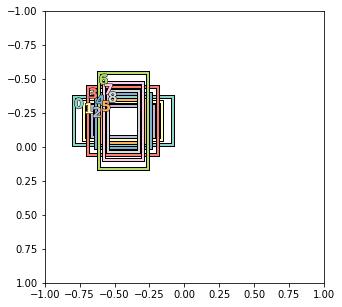

In [37]:
show_boxes(anchors[900:909])

In [38]:
def activ_to_bbox(acts, anchors, flatten=True):
    "Extrapolate bounding boxes on anchors from the model activations."
    if flatten:
        acts.mul_(acts.new_tensor([[0.1, 0.1, 0.2, 0.2]])) #Can't remember where those scales come from, but they help regularize
        centers = anchors[...,2:] * acts[...,:2] + anchors[...,:2]
        sizes = anchors[...,2:] * torch.exp(acts[...,:2])
        return torch.cat([centers, sizes], -1)
    else: return [activ_to_bbox(act,anc) for act,anc in zip(acts, anchors)]
    return res

In [39]:
def cthw2tlbr(boxes):
    "Convert center/size format `boxes` to top/left bottom/right corners."
    top_left = boxes[:,:2] - boxes[:,2:]/2
    bot_right = boxes[:,:2] + boxes[:,2:]/2
    return torch.cat([top_left, bot_right], 1)

In [40]:
def intersection(anchors, targets):
    "Compute the sizes of the intersections of `anchors` by `targets`."
    ancs, tgts = cthw2tlbr(anchors), cthw2tlbr(targets)
    a, t = ancs.size(0), tgts.size(0)
    ancs, tgts = ancs.unsqueeze(1).expand(a,t,4), tgts.unsqueeze(0).expand(a,t,4)
    top_left_i = torch.max(ancs[...,:2], tgts[...,:2])
    bot_right_i = torch.min(ancs[...,2:], tgts[...,2:])
    sizes = torch.clamp(bot_right_i - top_left_i, min=0) 
    return sizes[...,0] * sizes[...,1]

In [41]:
def IoU_values(anchors, targets):
    "Compute the IoU values of `anchors` by `targets`."
    inter = intersection(anchors, targets)
    anc_sz, tgt_sz = anchors[:,2] * anchors[:,3], targets[:,2] * targets[:,3]
    union = anc_sz.unsqueeze(1) + tgt_sz.unsqueeze(0) - inter
    return inter/(union+1e-8)

In [42]:
def match_anchors(anchors, targets, match_thr=0.5, bkg_thr=0.4):
    "Match `anchors` to targets. -1 is match to background, -2 is ignore."
    matches = anchors.new(anchors.size(0)).zero_().long() - 2
    if targets.numel() == 0: return matches
    ious = IoU_values(anchors, targets)
    vals,idxs = torch.max(ious,1)
    matches[vals < bkg_thr] = -1
    matches[vals > match_thr] = idxs[vals > match_thr]
    #Overwrite matches with each target getting the anchor that has the max IoU.
    #vals,idxs = torch.max(ious,0)
    #If idxs contains repetition, this doesn't bug and only the last is considered.
    #matches[idxs] = targets.new_tensor(list(range(targets.size(0)))).long()
    return matches

In [43]:
def tlbr2cthw(boxes):
    "Convert top/left bottom/right format `boxes` to center/size corners."
    center = (boxes[:,:2] + boxes[:,2:])/2
    sizes = boxes[:,2:] - boxes[:,:2]
    return torch.cat([center, sizes], 1)

In [44]:
def bbox_to_activ(bboxes, anchors, flatten=True):
    "Return the target of the model on `anchors` for the `bboxes`."
    if flatten:
        t_centers = (bboxes[...,:2] - anchors[...,:2]) / anchors[...,2:] 
        t_sizes = torch.log(bboxes[...,2:] / anchors[...,2:] + 1e-8) 
        return torch.cat([t_centers, t_sizes], -1).div_(bboxes.new_tensor([[0.1, 0.1, 0.2, 0.2]]))
    else: return [activ_to_bbox(act,anc) for act,anc in zip(acts, anchors)]
    return res

In [45]:
def encode_class(idxs, n_classes):
    target = idxs.new_zeros(len(idxs), n_classes).float()
    mask = idxs != 0
    i1s = LongTensor(list(range(len(idxs))))
    target[i1s[mask],idxs[mask]-1] = 1
    return target

In [46]:
class RetinaNetFocalLoss(nn.Module):
    
    def __init__(self, gamma:float=2., alpha:float=0.25,  pad_idx:int=0, scales:Collection[float]=None, 
                 ratios:Collection[float]=None, reg_loss:LossFunction=F.smooth_l1_loss):
        super().__init__()
        self.gamma,self.alpha,self.pad_idx,self.reg_loss = gamma,alpha,pad_idx,reg_loss
        self.scales = ifnone(scales, [1,2**(-1/3), 2**(-2/3)])
        self.ratios = ifnone(ratios, [1/2,1,2])
        
    def _change_anchors(self, sizes:Sizes) -> bool:
        if not hasattr(self, 'sizes'): return True
        for sz1, sz2 in zip(self.sizes, sizes):
            if sz1[0] != sz2[0] or sz1[1] != sz2[1]: return True
        return False
    
    def _create_anchors(self, sizes:Sizes, device:torch.device):
        self.sizes = sizes
        self.anchors = create_anchors(sizes, self.ratios, self.scales).to(device)
    
    def _unpad(self, bbox_tgt, clas_tgt):
        i = torch.min(torch.nonzero(clas_tgt-self.pad_idx))
        return tlbr2cthw(bbox_tgt[i:]), clas_tgt[i:]-1+self.pad_idx
    
    def _focal_loss(self, clas_pred, clas_tgt):
        encoded_tgt = encode_class(clas_tgt, clas_pred.size(1))
        ps = torch.sigmoid(clas_pred.detach())
        weights = encoded_tgt * (1-ps) + (1-encoded_tgt) * ps
        alphas = (1-encoded_tgt) * self.alpha + encoded_tgt * (1-self.alpha)
        weights.pow_(self.gamma).mul_(alphas)
        clas_loss = F.binary_cross_entropy_with_logits(clas_pred, encoded_tgt, weights, reduction='sum')
        return clas_loss
        
    def _one_loss(self, clas_pred, bbox_pred, clas_tgt, bbox_tgt):
        bbox_tgt, clas_tgt = self._unpad(bbox_tgt, clas_tgt)
        matches = match_anchors(self.anchors, bbox_tgt)
        bbox_mask = matches>=0
        if bbox_mask.sum() != 0:
            bbox_pred = bbox_pred[bbox_mask]
            bbox_tgt = bbox_tgt[matches[bbox_mask]]
            bb_loss = self.reg_loss(bbox_pred, bbox_to_activ(bbox_tgt, self.anchors[bbox_mask]))
        else: bb_loss = 0.
        matches.add_(1)
        clas_tgt = clas_tgt + 1
        clas_mask = matches>=0
        clas_pred = clas_pred[clas_mask]
        clas_tgt = torch.cat([clas_tgt.new_zeros(1).long(), clas_tgt])
        clas_tgt = clas_tgt[matches[clas_mask]]
        return bb_loss + self._focal_loss(clas_pred, clas_tgt)/torch.clamp(bbox_mask.sum(), min=1.)
    
    def forward(self, output, bbox_tgts, clas_tgts):
        clas_preds, bbox_preds, sizes = output
        if self._change_anchors(sizes): self._create_anchors(sizes, clas_preds.device)
        n_classes = clas_preds.size(2)
        return sum([self._one_loss(cp, bp, ct, bt)
                    for (cp, bp, ct, bt) in zip(clas_preds, bbox_preds, clas_tgts, bbox_tgts)])/clas_tgts.size(0)

In [47]:
class SigmaL1SmoothLoss(nn.Module):

    def forward(self, output, target):
        reg_diff = torch.abs(target - output)
        reg_loss = torch.where(torch.le(reg_diff, 1/9), 4.5 * torch.pow(reg_diff, 2), reg_diff - 1/18)
        return reg_loss.mean()

In [48]:
ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)]
#scales = [1,2**(1/3), 2**(2/3)] for bigger size

In [49]:
encoder = create_body(models.resnet50, cut=-2)
model = RetinaNet(encoder, data.c, final_bias=-4)
crit = RetinaNetFocalLoss(scales=scales, ratios=ratios)
learn = Learner(data, model, loss_func=crit)

In [50]:
learn.model

RetinaNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, ker

In [51]:
torch.sigmoid(tensor([-4.]))

tensor([0.0180])

In [52]:
def retina_net_split(model):
    groups = [list(model.encoder.children())[:6], list(model.encoder.children())[6:]]
    return groups + [list(model.children())[1:]]

In [53]:
learn = learn.split(retina_net_split)

In [65]:
learn.freeze()

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


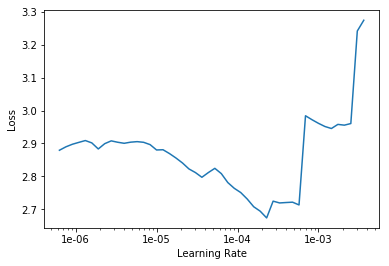

In [55]:
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(10, 1e-4)

In [68]:
learn.save('stage1-128')

In [69]:
learn.unfreeze()

In [71]:
learn.fit_one_cycle(20, slice(1e-6, 5e-5))

In [72]:
learn.save('stage2-128')

In [73]:
learn.data = get_data(32,192)

In [74]:
learn.freeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


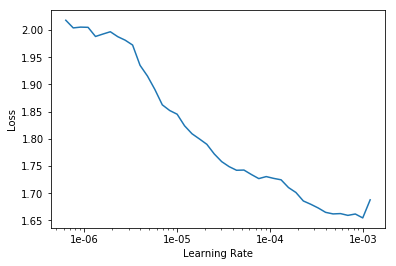

In [75]:
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(10, 1e-5)
# 2 mins

In [77]:
learn.save('stage1-192')

In [78]:
learn.unfreeze()

In [79]:
learn.fit_one_cycle(20, slice(1e-6, 5e-5))
# 4 mins

In [80]:
learn.save('stage2-192')

In [66]:
learn.data = get_data(24,256)

In [82]:
learn.freeze()
learn.fit_one_cycle(10, 1e-5)
# 6 mins

In [83]:
learn.save('stage1-256')

In [84]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-6, 5e-5))
# 12 mins

In [85]:
learn.save('stage2-256')

In [63]:
learn.load('stage2-256')

Learner(data=ImageDataBunch;

Train: LabelList (636 items)
x: ObjectItemList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: ObjectCategoryList
ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512)
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages;

Valid: LabelList (159 items)
x: ObjectItemList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: ObjectCategoryList
ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512)
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages;

Test: None, model=RetinaNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, pa

In [57]:
learn.data = get_data(8,512)

In [55]:
learn.freeze()
learn.fit_one_cycle(10, 1e-4)
# 20 mins

In [56]:
learn.save('stage1-512')

In [57]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-6, 5e-5))
# 40 mins

In [77]:
learn.save('stage2-512')

In [114]:
learn.load('stage2-512')

Learner(data=ImageDataBunch;

Train: LabelList (636 items)
x: ObjectItemList
Image (3, 500, 375),Image (3, 540, 346),Image (3, 768, 1024),Image (3, 446, 670),Image (3, 768, 1024)
y: ObjectCategoryList
ImageBBox (500, 375),ImageBBox (540, 346),ImageBBox (768, 1024),ImageBBox (446, 670),ImageBBox (768, 1024)
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages;

Valid: LabelList (159 items)
x: ObjectItemList
Image (3, 225, 198),Image (3, 768, 1024),Image (3, 683, 1024),Image (3, 444, 500),Image (3, 800, 567)
y: ObjectCategoryList
ImageBBox (225, 198),ImageBBox (768, 1024),ImageBBox (683, 1024),ImageBBox (444, 500),ImageBBox (800, 567)
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages;

Test: LabelList (451 items)
x: ObjectItemList
Image (3, 720, 1280),Image (3, 720, 1280),Image (3, 720, 1280),Image (3, 720, 1280),Image (3, 720, 1280)
y: EmptyLabelList
,,,,
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages, model=RetinaNet(
  (encoder): Sequential(
    (0): Conv

In [67]:
learn.data = get_data(4,720)

In [62]:
learn.freeze()
learn.fit_one_cycle(10, 1e-4)
# 40 mins

In [64]:
learn.save('stage1-720')

In [55]:
learn.load('stage1-720')

Learner(data=ImageDataBunch;

Train: LabelList (636 items)
x: ObjectItemList
Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720)
y: ObjectCategoryList
ImageBBox (720, 720),ImageBBox (720, 720),ImageBBox (720, 720),ImageBBox (720, 720),ImageBBox (720, 720)
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages;

Valid: LabelList (159 items)
x: ObjectItemList
Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720)
y: ObjectCategoryList
ImageBBox (720, 720),ImageBBox (720, 720),ImageBBox (720, 720),ImageBBox (720, 720),ImageBBox (720, 720)
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages;

Test: None, model=RetinaNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, pa

In [70]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-6, 5e-5))
# 80 mins

In [72]:
learn.save('stage2-720')
# about 3.5 hours total training
# HD quality high accuracy coca-cola logo detector

In [54]:
learn.load('stage2-720')

Learner(data=ImageDataBunch;

Train: LabelList (636 items)
x: ObjectItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ObjectCategoryList
ImageBBox (128, 128),ImageBBox (128, 128),ImageBBox (128, 128),ImageBBox (128, 128),ImageBBox (128, 128)
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages;

Valid: LabelList (159 items)
x: ObjectItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ObjectCategoryList
ImageBBox (128, 128),ImageBBox (128, 128),ImageBBox (128, 128),ImageBBox (128, 128),ImageBBox (128, 128)
Path: /home/jupyter/logo-detection/data/openlogo/JPEGImages;

Test: None, model=RetinaNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, pa

In [55]:
img,target = next(iter(data.valid_dl))
with torch.no_grad():
    output = learn.model(img)

In [98]:
img,target = next(iter(data.test_dl))
with torch.no_grad():
    output = learn.model(img)
    z = learn.model.eval()(img)

TypeError: 'NoneType' object is not iterable

In [56]:
def unpad(tgt_bbox, tgt_clas, pad_idx=0):
    i = torch.min(torch.nonzero(tgt_clas-pad_idx))
    return tlbr2cthw(tgt_bbox[i:]), tgt_clas[i:]-1+pad_idx

In [57]:
# def process_output(output, i, detect_thresh=0.25):
#     "Process `output[i]` and return the predicted bboxes above `detect_thresh`."
#     clas_pred,bbox_pred,sizes = output[0][i], output[1][i], output[2]
#     anchors = create_anchors(sizes, ratios, scales).to(clas_pred.device)
#     bbox_pred = activ_to_bbox(bbox_pred, anchors)
#     clas_pred = torch.sigmoid(clas_pred)
#     detect_mask = clas_pred.max(1)[0] > detect_thresh
#     bbox_pred, clas_pred = bbox_pred[detect_mask], clas_pred[detect_mask]
#     bbox_pred = tlbr2cthw(torch.clamp(cthw2tlbr(bbox_pred), min=-1, max=1))    
#     scores, preds = clas_pred.max(1)
#     return bbox_pred, scores, preds

In [58]:
def _draw_outline(o:Patch, lw:int):
    "Outline bounding box onto image `Patch`."
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax:plt.Axes, b:Collection[int], color:str='white', text=None, text_size=14):
    "Draw bounding box on `ax`."
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    _draw_outline(patch, 4)
    if text is not None:
        patch = ax.text(*b[:2], text, verticalalignment='top', color=color, fontsize=text_size, weight='bold')
        _draw_outline(patch,1)

In [59]:
# def show_preds(img, output, idx, detect_thresh=0.25, classes=None):
#     bbox_pred, scores, preds = process_output(output, idx, detect_thresh)
#     bbox_pred, preds, scores = bbox_pred.cpu(), preds.cpu(), scores.cpu()
#     t_sz = torch.Tensor([*img.size])[None].float()
#     bbox_pred[:,:2] = bbox_pred[:,:2] - bbox_pred[:,2:]/2
#     bbox_pred[:,:2] = (bbox_pred[:,:2] + 1) * t_sz/2
#     bbox_pred[:,2:] = bbox_pred[:,2:] * t_sz
#     bbox_pred = bbox_pred.long()
#     _, ax = plt.subplots(1,1)
#     for bbox, c, scr in zip(bbox_pred, preds, scores):
#         img.show(ax=ax)
#         txt = str(c.item()) if classes is None else classes[c.item()+1]
#         draw_rect(ax, [bbox[1],bbox[0],bbox[3],bbox[2]], text=f'{txt} {scr:.2f}')

In [60]:
# idx = 0
# img = data.valid_ds[idx][0]
# show_preds(img, output, idx, detect_thresh=0.3, classes=data.classes)

In [61]:
def nms(boxes, scores, thresh=0.3):
    idx_sort = scores.argsort(descending=True)
    boxes, scores = boxes[idx_sort], scores[idx_sort]
    to_keep, indexes = [], torch.LongTensor(range_of(scores))
    while len(scores) > 0:
        to_keep.append(idx_sort[indexes[0]])
        iou_vals = IoU_values(boxes, boxes[:1]).squeeze()
        mask_keep = iou_vals < thresh
        if len(mask_keep.nonzero()) == 0: break
        boxes, scores, indexes = boxes[mask_keep], scores[mask_keep], indexes[mask_keep]
    return LongTensor(to_keep)

In [62]:
def process_output(output, i, detect_thresh=0.25):
    clas_pred,bbox_pred,sizes = output[0][i], output[1][i], output[2]
    anchors = create_anchors(sizes, ratios, scales).to(clas_pred.device)
    bbox_pred = activ_to_bbox(bbox_pred, anchors)
    clas_pred = torch.sigmoid(clas_pred)
    detect_mask = clas_pred.max(1)[0] > detect_thresh
    bbox_pred, clas_pred = bbox_pred[detect_mask], clas_pred[detect_mask]
    bbox_pred = tlbr2cthw(torch.clamp(cthw2tlbr(bbox_pred), min=-1, max=1))    
    if clas_pred.numel() == 0: return [],[],[]
    scores, preds = clas_pred.max(1)
    return bbox_pred, scores, preds

In [63]:
def show_preds(img, output, idx, detect_thresh=0.25, classes=None, ax=None):
    bbox_pred, scores, preds = process_output(output, idx, detect_thresh)
    if len(scores) != 0:
        to_keep = nms(bbox_pred, scores)
        bbox_pred, preds, scores = bbox_pred[to_keep].cpu(), preds[to_keep].cpu(), scores[to_keep].cpu()
        t_sz = torch.Tensor([*img.size])[None].float()
        bbox_pred[:,:2] = bbox_pred[:,:2] - bbox_pred[:,2:]/2
        bbox_pred[:,:2] = (bbox_pred[:,:2] + 1) * t_sz/2
        bbox_pred[:,2:] = bbox_pred[:,2:] * t_sz/2
        bbox_pred = bbox_pred.long()
    if ax is None: _, ax = plt.subplots(1,1)
    img.show(ax=ax)
    for bbox, c, scr in zip(bbox_pred, preds, scores):
        txt = str(c.item()) if classes is None else classes[c.item()+1]
        draw_rect(ax, [bbox[1],bbox[0],bbox[3],bbox[2]], text=f'{txt} {scr:.2f}')

In [64]:
from itertools import islice

In [65]:
def show_results(learn, start=0, n=5, detect_thresh=0.35, figsize=(10,25)):
    x,y = learn.data.one_batch(DatasetType.Valid, cpu=False)
    with torch.no_grad():
        z = learn.model.eval()(x)
    _,axs = plt.subplots(n, 2, figsize=figsize)
    for i in range(n):
        img,bbox = learn.data.valid_ds[start+i]
        img.show(ax=axs[i,0], y=bbox)
        show_preds(img, z, start+i, detect_thresh=detect_thresh, classes=learn.data.classes, ax=axs[i,1])

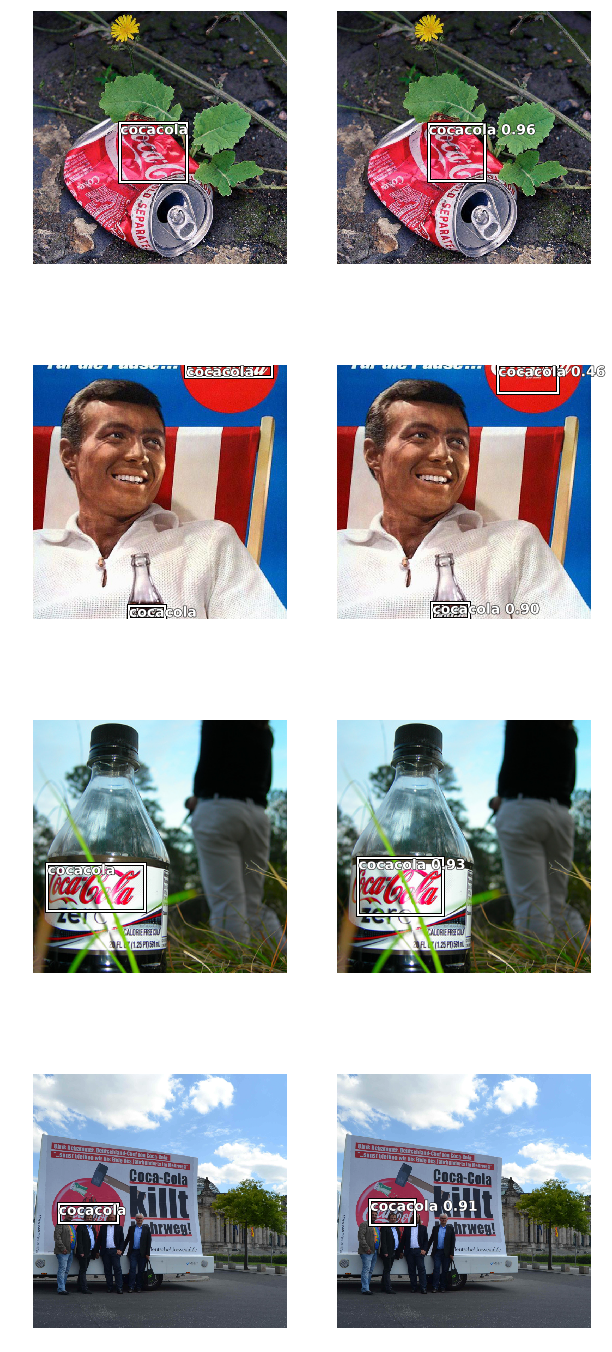

In [68]:
show_results(learn, n=4, detect_thresh=0.4)

In [69]:
path_test = Path('/home/jupyter/logo-detection/data/world_cup')

In [79]:
path_test = Path('/home/jupyter/logo-detection/data/college_game_day')

torch.Size([720, 1280])


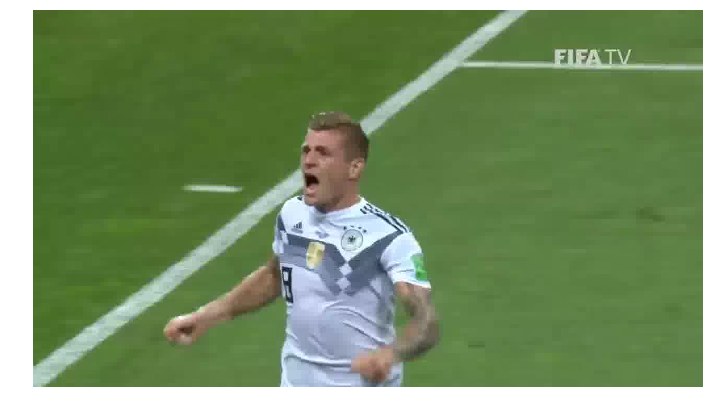

In [70]:
img = open_image(path_test/'JPEGImages/0020.jpg')
img.show(figsize=(12,8))
print(img.size)

In [80]:
def get_data_test(bs, size):
    src = ObjectItemList.from_df(img2bbox_df_red, path_test/'JPEGImages')
    src = src.split_by_rand_pct()
    src = src.label_from_df(cols='label')
    src = src.add_test_folder(path_test/'JPEGImages', tfms=None)
    #src =  src.add_test(ImageList.from_df(img2bbox_df_red_red, path/'JPEGImages'))
    src = src.transform()#size=size)
    return src.databunch(path=path, bs=bs)#, collate_fn=bb_pad_collate)

In [72]:
def show_results_test(learn, batch=0, n=5, detect_thresh=0.35, figsize=(10,20)):
    #x,y = learn.data.one_batch(DatasetType.Test, cpu=False)
    s = iter(learn.data.test_dl)
    x,y = next(islice(s,batch,batch+1))
    #x,y = next(iter(learn.data.test_dl))
    with torch.no_grad():
        z = learn.model.eval()(x)
    _,axs = plt.subplots(n, 1, figsize=figsize)
    for i in range(n):
        #img,bbox = learn.data.valid_ds[start+i]
        img,bbox = learn.data.test_ds[batch*4+i]
        #img.show(ax=axs[i,0], y=bbox)
        show_preds(img, z, i, detect_thresh=detect_thresh, classes=learn.data.classes, ax=axs[i])

In [81]:
learn.data = get_data_test(4,720)

You can deactivate this warning by passing `no_check=True`.


/opt/anaconda3/lib/python3.7/site-packages/fastai/basic_data.py:259: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access any element of self.train_ds.
Tried: 161,12,279,466
  warn(warn_msg)


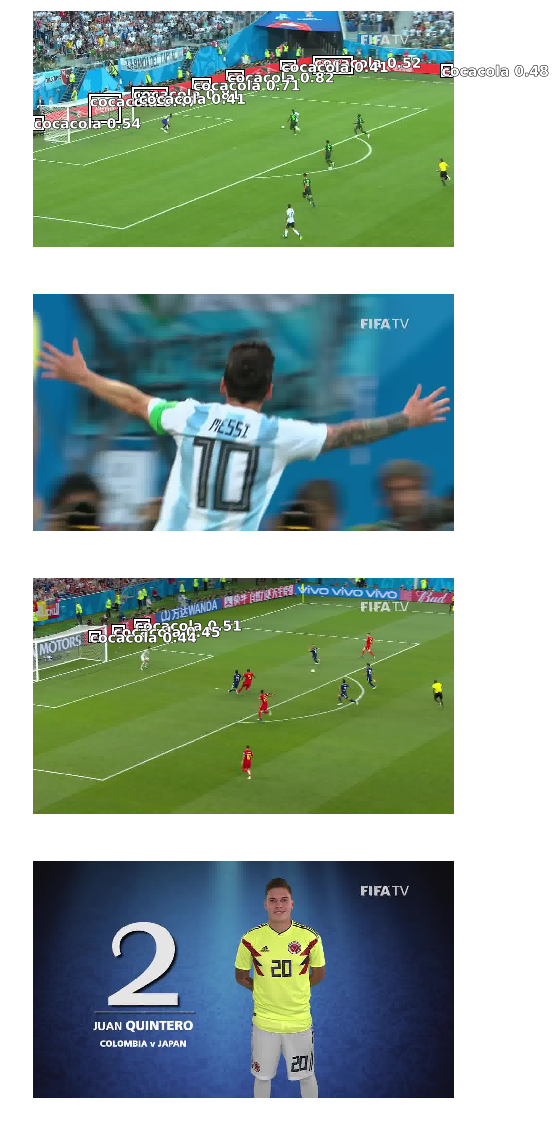

In [74]:
show_results_test(learn, batch=43, n=4, detect_thresh=0.4)

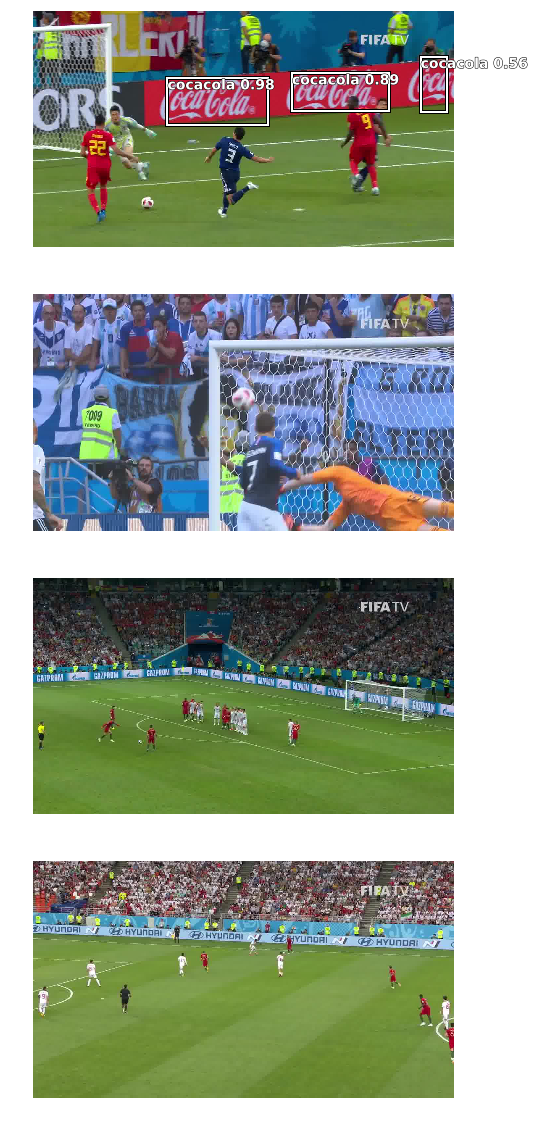

In [75]:
show_results_test(learn, batch=62, n=4, detect_thresh=0.5)

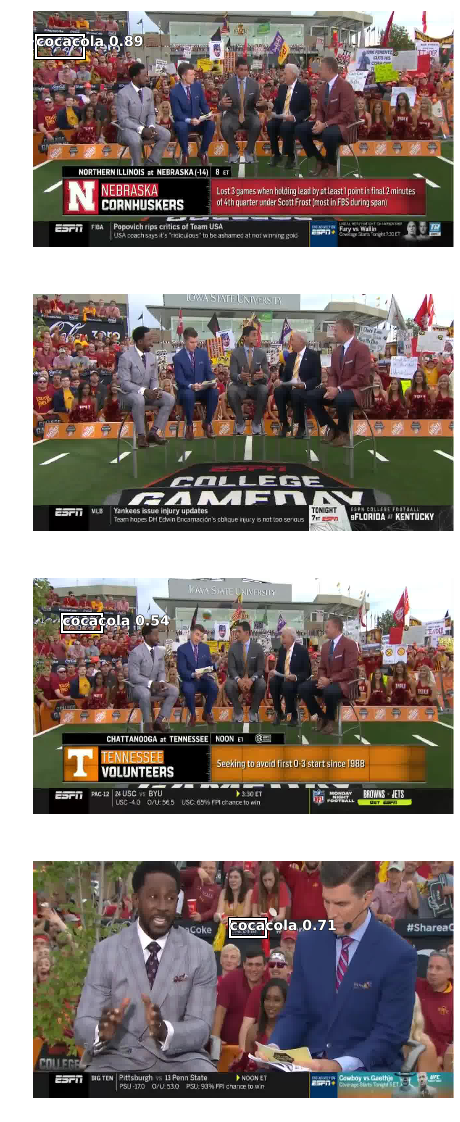

In [82]:
show_results_test(learn, batch=57, n=4, detect_thresh=0.4)

In [167]:
img2bbox_df_red_red = img2bbox_df_red[:8]

In [ ]:
learn = load_learner(path, test=ImageList.from_folder(path_test/'JPEGImages'))

In [172]:
data_test = ImageList.from_folder(path_test/'JPEGImages')

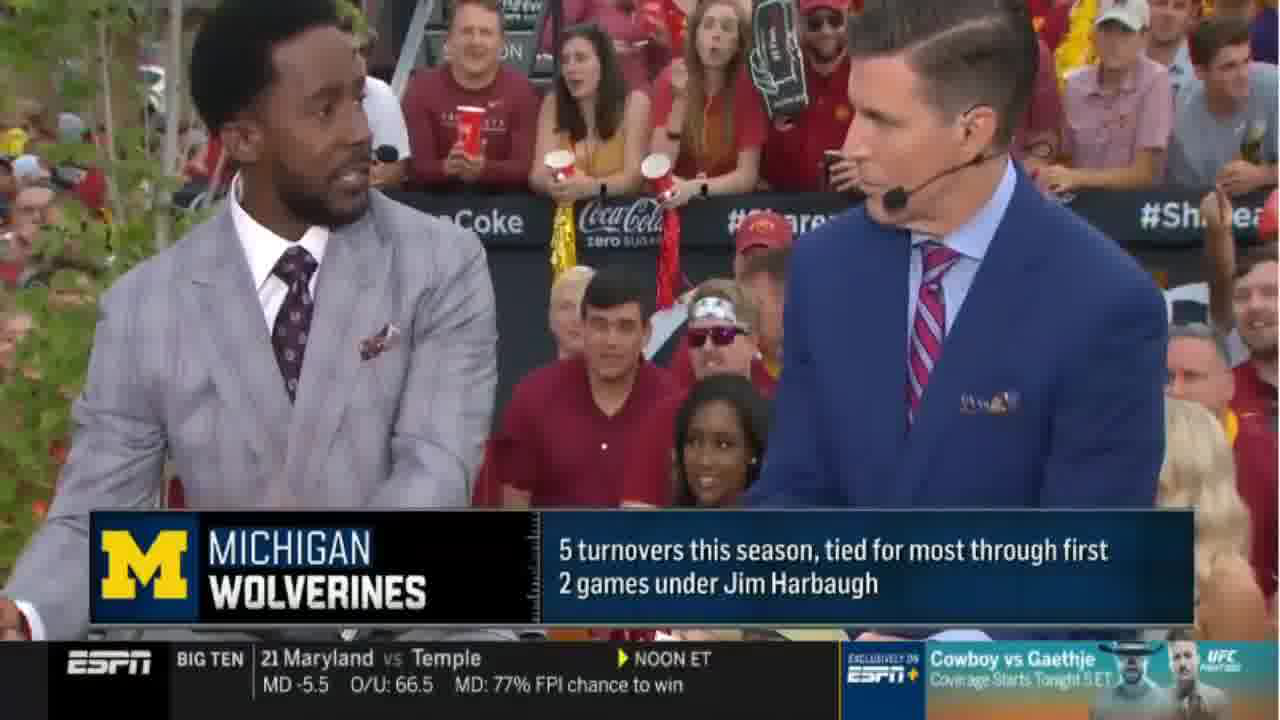

In [173]:
data_test[50]